# Other Regression Methods

In this project, we will create linear regression model of the boston housing dataset using the following technique:
- linear regression
- decision tree regressor
- random forest regressor
- gradient boosting regressor
- adaboost regressor
- xgboost regressor

References:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- https://machinelearningmastery.com/xgboost-for-regression/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

# Import Libraries and Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor # Simple Neural Network

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('cleaned_boston_modified.csv')

# EDA and Data Pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     408 non-null    float64
 1   zn       408 non-null    float64
 2   indus    408 non-null    float64
 3   nox      408 non-null    float64
 4   rm       408 non-null    float64
 5   age      408 non-null    float64
 6   dis      408 non-null    float64
 7   rad      408 non-null    float64
 8   tax      408 non-null    float64
 9   black    408 non-null    float64
 10  lstat    408 non-null    float64
 11  ptratio  408 non-null    float64
 12  medv     408 non-null    float64
dtypes: float64(13)
memory usage: 41.6 KB


In [6]:
df["price"] = df.medv*25000
df.drop("medv", axis=1, inplace=True)
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,black,lstat,ptratio,price
0,0.01870,85.0,4.15,0.429,6.516,27.7,8.5353,4.0,351.0,392.43,6.36,17.9,577500.0
1,88.97620,0.0,18.10,0.671,6.968,91.9,1.4165,24.0,666.0,396.90,17.21,20.2,260000.0
2,0.06211,40.0,1.25,0.429,6.490,44.4,8.7921,1.0,335.0,396.90,5.98,19.7,572500.0
3,0.04301,80.0,1.91,0.413,5.663,21.9,10.5857,4.0,334.0,382.80,8.05,22.0,455000.0
4,0.19073,22.0,5.86,0.431,6.718,17.5,7.8265,7.0,330.0,393.74,6.56,19.1,655000.0


C:\Users\sarifb\AppData\Local\Temp\ipykernel_4828\2964020991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["price"]], color='g', bins=50)


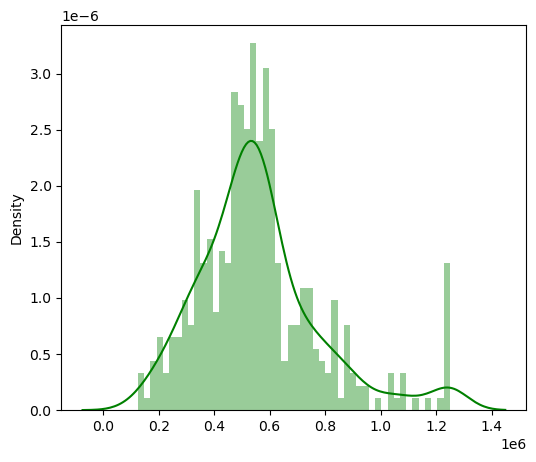

In [7]:
plt.figure(figsize=(6,5))
sns.distplot(df[["price"]], color='g', bins=50)
plt.show()

In [8]:
df.loc[df.loc[df["price"]>1e6].index,:]

,crim,zn,indus,nox,rm,age,dis,rad,tax,black,lstat,ptratio,price
25,1.22358,0.0,19.58,0.6050,6.943,97.4,1.8773,5.0,403.0,363.43,4.59,14.7,1032500.0
30,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5.0,403.0,374.43,1.73,14.7,1250000.0
64,5.66998,0.0,18.10,0.6310,6.683,96.8,1.3567,24.0,666.0,375.33,3.73,20.2,1250000.0
88,9.23230,0.0,18.10,0.6310,6.216,100.0,1.1691,24.0,666.0,366.15,9.53,20.2,1250000.0
95,6.53876,0.0,18.10,0.6310,7.016,97.5,1.2024,24.0,666.0,392.05,2.96,20.2,1250000.0
99,0.29819,0.0,6.20,0.5040,7.686,17.0,3.3751,8.0,307.0,377.51,3.92,17.4,1167500.0
105,0.05602,0.0,2.46,0.4880,7.831,53.6,3.1992,3.0,193.0,392.63,4.45,17.8,1250000.0
118,0.01381,80.0,0.46,0.4220,7.875,32.0,5.6484,4.0,255.0,394.23,2.97,14.4,1250000.0
125,0.57834,20.0,3.97,0.5750,8.297,67.0,2.4216,5.0,264.0,384.54,7.44,13.0,1250000.0
137,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4.0,224.0,390.55,2.88,14.7,1250000.0


In [9]:
# the house with price 1050000 is outlier
df.drop(df.loc[df['price']==1.05e6].index, inplace=True)

C:\Users\sarifb\AppData\Local\Temp\ipykernel_4828\1607476954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["rm"]], color='b', bins=30)


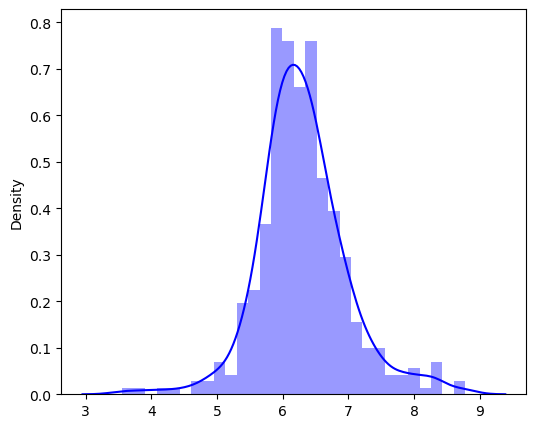

In [10]:
plt.figure(figsize=(6,5))
sns.distplot(df[["rm"]], color='b', bins=30)
plt.show()

In [11]:
# let's cut the observation where rm<4
df.drop(df.loc[df['rm']<4].index, inplace=True)

In [12]:
response = df.price
features = df.drop('price', axis=1)

In [13]:
df.corr()

,crim,zn,indus,nox,rm,age,dis,rad,tax,black,lstat,ptratio,price
crim,1.000000,-0.192676,0.398948,0.404222,-0.167739,0.344742,-0.371396,0.603640,0.564277,-0.374245,0.428752,0.288631,-0.400609
zn,-0.192676,1.000000,-0.531968,-0.497284,0.305109,-0.546045,0.657542,-0.307402,-0.288008,0.174853,-0.412650,-0.366270,0.353312
indus,0.398948,-0.531968,1.000000,0.759665,-0.345853,0.630397,-0.700767,0.606098,0.718103,-0.372894,0.607127,0.349016,-0.495676
nox,0.404222,-0.497284,0.759665,1.000000,-0.257756,0.728985,-0.761047,0.607144,0.658512,-0.393471,0.591508,0.161345,-0.439571
rm,-0.167739,0.305109,-0.345853,-0.257756,1.000000,-0.203617,0.168920,-0.148817,-0.223729,0.112566,-0.611073,-0.321949,0.718324
age,0.344742,-0.546045,0.630397,0.728985,-0.203617,1.000000,-0.738150,0.458400,0.499517,-0.271125,0.602849,0.222395,-0.387499
dis,-0.371396,0.657542,-0.700767,-0.761047,0.168920,-0.738150,1.000000,-0.492740,-0.521464,0.301508,-0.504524,-0.196010,0.264667
rad,0.603640,-0.307402,0.606098,0.607144,-0.148817,0.458400,-0.492740,1.000000,0.914981,-0.465315,0.503929,0.481936,-0.428018
tax,0.564277,-0.288008,0.718103,0.658512,-0.223729,0.499517,-0.521464,0.914981,1.000000,-0.459277,0.548140,0.460574,-0.499116
black,-0.374245,0.174853,-0.372894,-0.393471,0.112566,-0.271125,0.301508,-0.465315,-0.459277,1.000000,-0.390614,-0.189736,0.361559


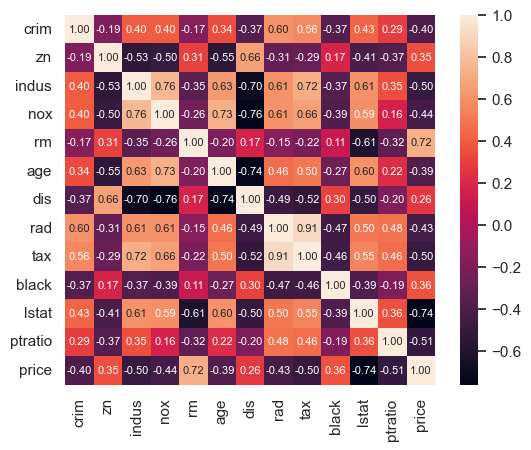

In [14]:
# Calculate and show correlation matrix
sns.set(font_scale=1)
hm = sns.heatmap(df.corr(),
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 8},
                yticklabels=df.columns,
                xticklabels=df.columns)

## Split the dataset and prepare some lists to store the models

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.2, random_state = 42)

models = []
r2 = []
rmse = []
names = []

## Simple Linear Regression

In [21]:
lrmodel = LinearRegression()
models.append(lrmodel)
names.append(lrmodel.__class__.__name__)

## Decision Tree Regression

In [22]:
dtmodel = DecisionTreeRegressor()
models.append(dtmodel)
names.append(dtmodel.__class__.__name__)

## Gradient Boosting Regression

In [23]:
gbmodel = GradientBoostingRegressor()
models.append(gbmodel)
names.append(gbmodel.__class__.__name__)

## Random Forest Regression

In [24]:
rfmodel = RandomForestRegressor()
models.append(rfmodel)
names.append(rfmodel.__class__.__name__)

## AdaBoost Regression

In [25]:
abmodel = AdaBoostRegressor()
models.append(abmodel)
names.append(abmodel.__class__.__name__)

## XGBoost Regression

In [26]:
xgmodel = XGBRegressor()
models.append(xgmodel)
names.append(xgmodel.__class__.__name__)

## CatBoost Regressor ##

In [27]:
# in catboost, you can either use iterations or number of estimators. There's also depth....
#cbmodel = CatBoostRegressor(iterations=100,learning_rate=0.1,verbose=False)
cbmodel = CatBoostRegressor(iterations=100,learning_rate=0.1,verbose=False)
models.append(cbmodel)
names.append(cbmodel.__class__.__name__)

## Feature Selection ##

In [28]:
select = SelectKBest(f_regression, k=8)

## Pipeline and Result

In [29]:
for model in models:
    pipe = Pipeline([("scaler",StandardScaler()),("selector", select),("regressor", model)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    r2.append(pipe.score(X_test, Y_test))
    rmse.append(mean_squared_error(Y_test, Y_pred, squared=False))


In [30]:
result_df = pd.DataFrame(zip(names,r2, rmse), columns=['Regressor', 'R^2 Score', 'RMSE Score'])

In [31]:
result_df.sort_values(by=['R^2 Score', 'RMSE Score'], ascending=[False,True])

,Regressor,R^2 Score,RMSE Score
6,CatBoostRegressor,0.907508,64882.381711
2,GradientBoostingRegressor,0.899606,67597.119087
3,RandomForestRegressor,0.894465,69306.277762
5,XGBRegressor,0.892351,69997.125874
1,DecisionTreeRegressor,0.834398,86817.459888
4,AdaBoostRegressor,0.830015,87958.853099
0,LinearRegression,0.743226,108105.905318


### Best Pipe ###

In [32]:
pipe = Pipeline([("scaler",StandardScaler()),("selector", select),
                 ("regressor", CatBoostRegressor(iterations=100,learning_rate=0.1,verbose=False))])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

In [19]:
#predictions = pipe.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model')

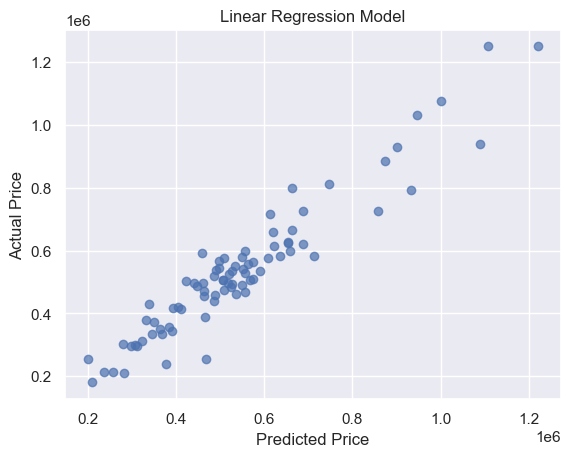

In [33]:

plt.scatter(Y_pred, Y_test, alpha=.7, color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
